Student Name: Sai Akhil Tekuri

Student Netid: st5050

# **Foundations of Data Science Fall 2022 - Homework 0 (30 points)**

---



### **Part 1: Pre-class survey (5 Points)**

---


- Fill in [this survey](https://forms.gle/NSDTZB7hNHgdPiyr5) which will help our course team understand student backgrounds and interests.


### **Part 2: Case study (5 Points)**

---


- Read [this article](https://drive.google.com/file/d/1zRxm8WrOtdeT1pQKgKcjzd3J1x8GLTtb/view?usp=sharing) in the New York Times.
- Use what we've learned in class to describe how one could set Target's problem up as a predictive modeling problem, such that they could have gotten the results that they did.  Formulate your solution as a proposed plan using  data science terminology discussed in class.  Include aspects of the Data Science Workflow that you see as relevant to solving the problem.  Be precise but concise.

Predicting Pregnancy:

- Target's problem: The shopping habits of parents right around the birth of their child are flexible. Target wants to target parents during this time (around the birth of their child) to buy products from them so that it becomes a habit in the future and increases sales.

- Target's Goal: Detect changes in the shopping patterns of the customers and predict if a women is pregnant.

- Get Data: Target has a baby-shower registry. Collect the shopping history and due date of women in this registry as a sample.

- Explore and model data: Analyse the data collected and identify the shopping patterns/products and build a model that gives each shopper a "pregnancy prediction" score

- Impact: The model predicts if a shopper is pregnant and the sales team sends out offers on baby products and others to attract these shoppers right around the birth of a child.


### **Part 3: Exploring data in the command line (4 Points - 1 Point Each)**

---




*   For this part we will be using the data file `"loansData.csv"`. This file
consists of records that pertain to some loan records in a local bank. There are 15 comma separated columns in this order:
>> `CustNUm`, `Amount.Requested`,	`Amount.Funded.By.Investors`,	`Interest.Rate`,	`Loan.Length`,	`Loan.Purpose`,	`Debt.To.Income.Ratio`,	`State`,	`Home.Ownership`,	`Monthly.Income`,	`FICO.Range`,	`Open.CREDIT.Lines`,	`Revolving.CREDIT.Balance`,	`Inquiries.in.the.Last.6.Months`, and	`Employment.Length`.
*   These fields contain data of type `int`, `float`, and `string`, and you can also locate a file `"data/loansData_columns.csv"`in the data folder containing all the column names for easy reference.  Answer the following questions using Linux/Unix bash commands. All questions can be answered in one line (sometimes, with pipes)! Some questions will have many possible solutions. Don't forget that in iPython notebooks you must prefix all bash commands with an exclamation point, i.e. `"!command arguments"`.


>>**1**\. *How many records (lines) are in this file?*




In [1]:
# Place your code here
!tail -n +2 data/loansData.csv | wc -l

    2500


>>**2**\. *How many unique `State` (the 8th field) are in this file? (hint: consider the 'cut' command and use pipe operator '|')*



In [2]:
# Place your code here
!tail -n +2 data/loansData.csv | cut -d "," -f 8 | sort | uniq | wc -l

      46


>>**3**\. *Rank all domains by the number of `Loan.Purpose` (the 6th field) they requested in descending order. (hint: consider the 'cut', 'uniq' and 'sort' commands and the pipe operator).*



In [3]:
# Place your code here
!tail -n +2 data/loansData.csv | cut -d "," -f 6 | sort | uniq -c | sort -nr | awk '{print $2}' | nl

     1	"debt_consolidation"
     2	"credit_card"
     3	"other"
     4	"home_improvement"
     5	"major_purchase"
     6	"small_business"
     7	"car"
     8	"wedding"
     9	"medical"
    10	"moving"
    11	"vacation"
    12	"house"
    13	"educational"
    14	"renewable_energy"


>>**4**\. *List all records which have `FICO.Range` (the 11th field) from 815-819. (hint: this can be done using 'grep')*




In [4]:
# Place your code here
!tail -n +2 data/loansData.csv | grep -h "815-819"

"64884",9000,9000,"6.03%","36 months","vacation","5.58%","NJ","MORTGAGE",9583.33,"815-819",11,675,0,"n/a"
"55501",8000,8000,"6.03%","36 months","debt_consolidation","4.51%","OR","MORTGAGE",3500,"815-819",9,6737,0,"10+ years"
"93374",16500,16500,"6.03%","36 months","debt_consolidation","22.65%","CA","MORTGAGE",5416.67,"815-819",17,14835,0,"10+ years"
"90568",4800,4800,"6.62%","36 months","car","10.42%","TX","MORTGAGE",7291.67,"815-819",14,0,0,"< 1 year"
"80302",16800,16800,"7.90%","60 months","debt_consolidation","3.34%","FL","MORTGAGE",10666.67,"815-819",7,4757,0,"10+ years"
"5906",12800,12787.71,"8.94%","36 months","debt_consolidation","0.18%","AZ","MORTGAGE",2833.33,"815-819",7,306,0,"4 years"


### **Part 4: Dealing with data Pythonically (16 Points)**

---



In [5]:
# You might find these packages useful. You may import any others you want!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

>>**1**\. **(1 Point)** *Load the data set `"data/ads_dataset.tsv"` and load it into a Python Pandas data frame called `ads`.*




In [6]:
# Place your code here
# reading the tsv file
ads = pd.read_csv('data/ads_dataset.tsv', sep='\t', header=0)

>>**2**\. **(4 Points)** *Write a Python function called `getDfSummary()` that does the following:*
- *Takes as input a data frame*
- *For each variable in the data frame calculates the following features:*
  - *`number_nan` to count the number of missing not-a-number values*
  - *Ignoring missing, NA, and Null values:*
    - *`number_distinct` to count the number of distinct values a variable can take on*
    - *`mean`, `max`, `min`, `std` (standard deviation), and `25%`, `50%`, `75%` to correspond to the appropriate percentiles*
- *All of these new features should be loaded in a new data frame. Each row of the data frame should be a variable from the input data frame, and the columns should be the new summary features.*
- Returns this new data frame containing all of the summary information
>>**Hint:** *The pandas `describe()` [(manual page)](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) method returns a useful series of values that can be used here.*



In [7]:
def getDfSummary(input_data):
    # Place your code here
    
    # isna() returns true if the value is NsN and summing them all in each column to get the count
    number_nan = input_data.isna().sum(axis = 0)
    
    # nunique with axis=0, returns the distinct values in each column
    number_distinct = input_data.nunique(axis = 0)

    # get the stats of each column
    stats = input_data.describe()

    # building the desired data frame
    output_data = pd.concat([number_nan.rename('number_nan'), number_distinct.rename('number_distinct'), stats.loc['mean'], stats.loc['max'], stats.loc['min'], stats.loc['std'], stats.loc['25%'], stats.loc['50%'], stats.loc['75%']], axis=1)
    return output_data

>>**3**\. **(1 Point)** *How long does it take for your `getDfSummary()` function to work on your `ads` data frame? Show us the results below.*

>>**Hint:** *`%timeit getDfSummary(ads)`*



In [8]:
# Place your code here
%timeit getDfSummary(ads)

17.2 ms ± 39.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


>>**4**\. **(2 Points)** *Using the results returned from `getDfSummary()`, which fields, if any, contain missing `NaN` values?*




In [9]:
# Place your code here

# get the summary stats to result variable
result = getDfSummary(ads)

# extracting fields that contain missing NaN values
temp = result[result['number_nan'] > 0]

print("The following list of fields contain missing NaN values")
print(list(temp.index))

The following list of fields contain missing NaN values
['video_freq']


>>**5**\. **(4 Points)** *For the fields with missing values, does it look like the data is missing at random? Are there any other fields that correlate perfectly, or predict that the data is missing? If missing, what should the data value be?*

>>**Hint:** *create another data frame that has just the records with a missing value. Get a summary of this data frame using `getDfSummary()` and compare the differences. Do some feature distributions change dramatically?*

>>---



In [10]:
# Place your code and response here

# extracting records/instances which have video_freq as NaN
temp_df = ads[ads['video_freq'].isna() == True]

# getting summary stats of only those records
temp_df_summary = getDfSummary(temp_df)

# finding fields that take only one value of the video_freq is NaN
temp_correlation = temp_df_summary[temp_df_summary['number_distinct']==1]
display(temp_correlation)

print("Observations/Responses:")
print("1) No, the data in 'video_freq' field is not missing at random")
print("2) As you can see these 4 fields " + str(list(temp_correlation.index)) + " correlate perfectly with 'video_freq' field whenever it is missing")
print("3) For each instance the filed 'video_freq' is missing the value of each of these 4 fields is 0.0")
print("4) If the 'video_freq' field is missing, we can predict that the values each of these four fields will be 0.0")
print("5) You can also see there is no record/instance where each of the " + str(list(temp_correlation.index)) + " is 0 and 'video_freq' is not null")


# gettting the records which have ['is_video_user', 'video_interval', 'expected_video_time', 'multiple_video'] as 0 and  'video_freq' is not NaN
temp_df1 = ads[(ads['is_video_user'] == 0) & (ads['video_interval'] == 0) & (ads['expected_video_time'] == 0) & (ads['multiple_video'] == 0) & (ads['video_freq'].isna() == False)]

print("Data frame shape: " + str(temp_df1.shape))
print("6) Whenever each of these fields " + str(list(temp_correlation.index)) + " is 0 the the value of 'video_freq' will be missin")

,number_nan,number_distinct,mean,max,min,std,25%,50%,75%
is_video_user,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
video_interval,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
expected_video_time,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
multiple_video,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Observations/Responses:
1) No, the data in 'video_freq' field is not missing at random
2) As you can see these 4 fields ['is_video_user', 'video_interval', 'expected_video_time', 'multiple_video'] correlate perfectly with 'video_freq' field whenever it is missing
3) For each instance the filed 'video_freq' is missing the value of each of these 4 fields is 0.0
4) If the 'video_freq' field is missing, we can predict that the values each of these four fields will be 0.0
5) You can also see there is no record/instance where each of the ['is_video_user', 'video_interval', 'expected_video_time', 'multiple_video'] is 0 and 'video_freq' is not null
Data frame shape: (0, 14)
6) Whenever each of these fields ['is_video_user', 'video_interval', 'expected_video_time', 'multiple_video'] is 0 the the value of 'video_freq' will be missin


>>**6**\. (**2 Points)** *Which variables are binary?*




In [11]:
# Place your code here
print("The following list of fields are binary")
print(list(ads.columns[ads.isin([0,1]).all()]))

The following list of fields are binary
['is_video_user', 'multiple_video', 'multiple_carrier', 'is_churn']


>>**7**\. **(0.5 Point)** *Let's take a deeper look into one of the features, the `num_texts`, which stands for the number of text messages. Let's try and understand the distribution of this field. We can do this using the hist() method and matplotlib. Draw a histogram graph of `num_texts` from the dataframe `ads`, set the title of the graph as `'Histogram of Number of Texts'`.*

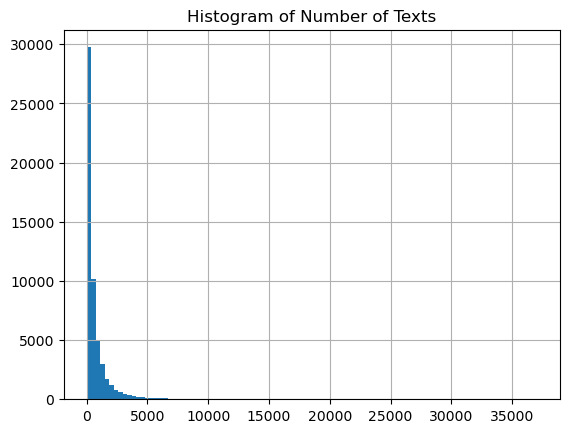

In [12]:
# Place your code here
# bins =100
hist = ads.hist('num_texts',bins =100)
title = plt.title('Histogram of Number of Texts')

>>**8**\. **(1.5 Point)** *How would you characterize the shape of this distribution? Is there anything we can do to the texts variable to make the distribution more bell curved?*

>>**Hint:** *Let's create a new column in the dataframe called `'log_num_texts'` and print a histogram `'Histogram of Log(Num Texts)'` of it. What might be some advantages of making such a transformation?*

1) Histogram of Number of Texts distribution can be characterized as an exponential distribution
2) So if we apply a logarithmic transformation to an exponential distribution variable, we will get variable with normal distribution (bell curve)
3) Histogram of Log(Num Texts) is more bell-curved
4) By making the log transformation, we can work in variable with normal distribution
5) Working with normal distribution is more convenient because it is symmetric, 95% of data contains in 2*standard deviation form mean, it depicts the distribution of values of many natural phenomena


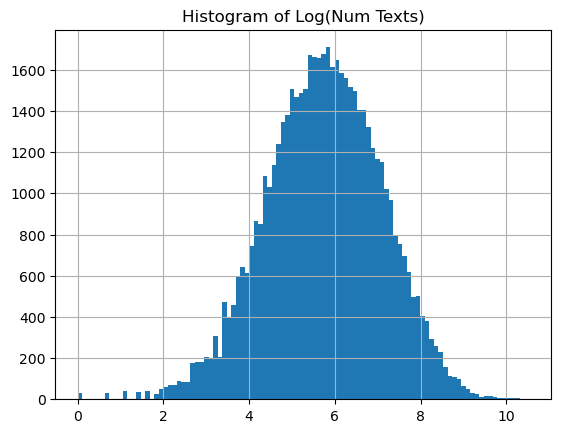

In [13]:
# Place your code and response here

#response
print("1) Histogram of Number of Texts distribution can be characterized as an exponential distribution")
print("2) So if we apply a logarithmic transformation to an exponential distribution variable, we will get variable with normal distribution (bell curve)")
print("3) Histogram of Log(Num Texts) is more bell-curved") 


ads["log_num_texts"] = np.log(ads["num_texts"])

#bins = 100
hist = ads.hist('log_num_texts',bins=100)
title = plt.title('Histogram of Log(Num Texts)')
print("4) By making the log transformation, we can work in variable with normal distribution")
print("5) Working with normal distribution is more convenient because it is symmetric, 95% of data contains in 2*standard deviation form mean, it depicts the distribution of values of many natural phenomena")

##  **End of Homework 0**